# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 12/6/2022
* Student Name: Iman Yousfi 
* Student Net ID: iy5sw
* This URL: https://github.com/imanyousfi/montecarlo/blob/main/final_project/FinalProjectSubmission.ipynb
* GitHub Repo URL: https://github.com/imanyousfi/montecarlo

# The Monte Carlo Module

# Test Module

In [ ]:
import pandas as pd
import numpy as np

class Die: 
    """ Die class that has N sides/faces,and W Weights, 
    which can be rolled to select a face"""

    def __init__(self, faces_array):
        """
        Takes an array of faces 
        Internally initializes weights to 1.0 for each face
        Saves faces & weights to a private dataframe
        """
        self.faces_array = faces_array
        self.weight_array = np.ones_like(faces_array)
        self.faces_weight_df = pd.DataFrame({'faces': self.faces_array, 'weight': self.weight_array})

    def weight_change(self, face_value, new_weight):
        """
        A method to change weight of a single side 
        Checks to see if the face passed is valid
        Checks to see if the weight is valid
        """

        if face_value in self.faces_weight_df['faces'].values:
            if isinstance(new_weight, float):
                self.faces_weight_df.at[self.faces_weight_df['faces'] == face_value, 'weight'] = new_weight
            else:
                np.float32(new_weight)
                self.faces_weight_df.at[self.faces_weight_df['faces'] == face_value, 'weight'] = new_weight
                #raise TypeError('New Weight must be a float -- Automatically Converted' )
        else:
            raise IndexError('Face is not in the Dataframe')
        

    def roll(self, rolls = 1):
        """
        A method to roll the die one or more times
        Takes a parameter of how many rolls
        Random Sample from the vector of faces according to the weights
        Returns a list of outcomes
        """
        rolled_outcomes = self.faces_weight_df.sample(n = rolls, weights = 'weight', replace = True)
        return list(rolled_outcomes['faces'])

    def show(self):
        """Returns the dataframe with all its glory: Intialized and/or Updated."""
        return self.faces_weight_df

class Game:
    """
    A game consists of rolling of one or more dice of the same kind one or more times
    Each game is initialized with a list of one or more of similarly defined dice (Die objects)
    By “same kind” and “similarly defined” we mean that each die in a given game has the same number of sides and set of faces,
    but each die object may have its own weights.
    The class has a behavior to play a game, i.e. to roll all of the dice a given number of times.
    The class keeps the results of its most recent play.
    
    """

    def __init__(self, Dice):
        """Takes a single parameter, a list of already instantiated similar Die objects"""
        self.Dice = Dice

    def play(self, rolls):
        """Takes a parameter to specify how many times the dice should be rolled
        Saves the result of the play to a private dataframe of shape N rolls by M dice"""
        self._play_outcome = pd.DataFrame()
        self.rolls = rolls
        M_Dice = 1

        for die in self.Dice:
            dice_results = die.roll(rolls=rolls)
            M_Dice += 1
            series = pd.Series(dice_results, name = f'Die Number {M_Dice}')
            self._play_outcome = pd.concat([self._play_outcome,series], axis =1)
        
        self._play_outcome['Roll'] = self._play_outcome.index + 1
        self._play_outcome = self._play_outcome.set_index('Roll')
        return self._play_outcome
        
    def show(self, form = 'wide'):
        """A method to show the user the results of the most recent play.
        This method just passes the private dataframe to the user.
        Takes a parameter to return the dataframe in narrow or wide form"""

        if form == 'wide':
            #making it public: 
            self.play_outcome = self._play_outcome
            return(self.play_outcome)
        elif form == 'narrow':
            self.narrow_play_outcome = self._play_outcome.stack()
            return(self.narrow_play_outcome)
        else: 
            raise TypeError('wide or narrow inputs only' )

class Analyzer:
    """An analyzer takes the results of a single game 
    Computes various descriptive statistical properties about it"""

    def __init__(self, game):
        """Takes a game object as its input parameter
        Initialization time, it also infers the data type of the die faces used."""
        self.game_df = game.show()
    
    def face_counts_per_roll(self):
        """Stores the results as a dataframe in a public attribute
        Dataframe has an index of the roll number and face values as columns """
        
        self.face_counts_per_roll = self.game_df.apply(lambda x: x.value_counts(), axis = 1)
        return self.face_counts_per_roll


    def jackpot(self):
        """A jackpot method to compute how many times the game resulted in all faces being identical"""
        
        df = self.face_counts_per_roll()
        jackpot_df = df[df.nunique(1) == 1]
        winners = len(jackpot_df)
        return winners
       
    def combo(self):
        """A combo method to compute the distinct combinations of faces rolled, along with their counts"""
        
        self.combo = self.game_df.apply(lambda x: x.sort_values().transpose(), axis=1).value_counts().to_frame('Count')
        self.combo = self.combo.sort_values(by='Count',ascending=False)
        return(self.combo)



In [ ]:
import unittest
from montecarlo import Die, Game, Analyzer
import pandas as pd 
import numpy as np

class MontecarloTestSuite(unittest.TestCase):
    """Unit tests to test if the methods return valid outputs"""
    
    def test_die(self):
        # Test if weights is created properly: 
        faces_array = [1,2,3,4,5,6]
        test1 = Die(faces_array)
        x = 1
        if x not in test1.faces_weight_df['weight'].values:
            raise AssertionError
   
   
    def test_weight_change(self):
        # Test the change_change() method: 
        faces_array = [1,2,3,4,5,6]
        test2 = Die(faces_array)
        test2.weight_change(5,5)
        assert (test2.faces_weight_df[test2.faces_weight_df['faces']==5]
        ['weight'],5)

    def test_roll(self):
        #Test to see if roll method works 5 rolls:
        faces_array = [1,2,3,4,5,6]
        test3 = Die(faces_array)
        roll = test3.roll(5)
        self.assertEqual(len(roll),5)

    def test_show(self): 
        #Tests if the roll is saved to df:
        faces_array = [1,2,3,4,5,6]
        test4 = Die(faces_array)
        test4_df = test4.show()
        test4_type = type(test4_df)
        x = pd.DataFrame()
        pd_type = type(x) 
        self.assertEqual(test4_type, pd_type)
        

    def test_play(self):
        # Tests if Dice is rolled at specified shape:
        faces_array = ([1,2,3,4,5])
        test4_1 = Die(faces_array)
        test4_2 = Die(faces_array)
        test4_3 = Die(faces_array)
        test4_4 = Die(faces_array)
        test4_5 = Die(faces_array)

        test4_dice_list = ([test4_1,test4_2,test4_3,test4_4,test4_5])
        test4_game = Game(test4_dice_list)
        test4_game.play(4)
        #show = public df
        test4_df = test4_game.show()
        expected_df = (4,5)
        actual_df = test4_df.shape
        self.assertEqual(actual_df, expected_df)
    
    def test_show(self):
        # Tests if Dice is rolled at specified shape:
        faces_array = ([1,2,3])
        test5_1 = Die(faces_array)
        test5_2 = Die(faces_array)
        
        test5_dice_list = ([test5_1,test5_2])
        test5_game = Game(test5_dice_list)
        test5_game.play(2)
        
        #show = public df
        test5_df = test5_game.show()
        expected_df = (2,2)
        actual_df = test5_df.shape
        self.assertEqual(actual_df, expected_df) 

    def test_face_counts_per_roll(self): 
        #checks to see if counts faces into a df: 
        faces_array = ([1,2,3])
        test6_1 = Die(faces_array)
        test6_2 = Die(faces_array)
        test6_dice_list = ([test6_1,test6_2])

        test6_game = Game(test6_dice_list)
        test6_game.play(2)
        test6_analyzer = Analyzer(test6_game)
        test6_df = test6_analyzer.face_counts_per_roll()
        shape = test6_df.shape[0]
        expected = 2
        self.assertEqual(shape, expected) 

    def test_jackpot(self):
        #checks if it gets winner number
        faces_array = ([1,2,3])
        test7_1 = Die(faces_array)
        test7_2 = Die(faces_array)
        test7_dice_list = ([test7_1,test7_2])

        test7_game = Game(test7_dice_list)
        test7_game.play(2)
        test7_analyzer = Analyzer(test7_game)
        test7_df = test7_analyzer.jackpot()
        self.assertIsInstance(test7_df, int)

    def test_combo(self): 
        #checks if combo returns df: 
        faces_array = ([1,2,3])
        test8_1 = Die(faces_array)
        test8_2 = Die(faces_array)
        test6_dice_list = ([test8_1,test8_2])

        test8_game = Game(test6_dice_list)
        test8_game.play(2)
        test8_analyzer = Analyzer(test8_game)
        test8_df = test8_analyzer.combo().size
        self.assertGreater(test8_df, 0)

if __name__ == '__main__':
    unittest.main(verbosity=3)

# Test Results

In [2]:
!python /Users/imanyousfi/Desktop/montecarlo/montecarlo_test.py

/Users/imanyousfi/Desktop/montecarlo/montecarlo_test.py:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (test2.faces_weight_df[test2.faces_weight_df['faces']==5]
test_combo (__main__.MontecarloTestSuite) ... ok
test_die (__main__.MontecarloTestSuite) ... ok
test_face_counts_per_roll (__main__.MontecarloTestSuite) ... ok
test_jackpot (__main__.MontecarloTestSuite) ... ok
test_play (__main__.MontecarloTestSuite) ... ok
test_roll (__main__.MontecarloTestSuite) ... ok
test_show (__main__.MontecarloTestSuite) ... ok
test_weight_change (__main__.MontecarloTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.063s

OK


# Scenarios


## Scenario 1

In [4]:
from montecarlo import Die, Game, Analyzer
import matplotlib.pyplot as plt

### 1:

In [5]:

faces_array = (['H', 'T'])
Fair_Coin = Die(faces_array)
Unfair_Coin  = Die(faces_array)
Unfair_Coin.weight_change("H", 5)
Unfair_Coin.faces_weight_df



,faces,weight
0,H,5
1,T,1


### 2: 

In [9]:
all_fair_list = ([Fair_Coin,Fair_Coin,Fair_Coin])
All_Fair = Game(all_fair_list)
All_Fair.play(1000)

,Die Number 2,Die Number 3,Die Number 4
Roll,,,
1,H,T,T
2,H,T,H
3,T,H,H
4,T,H,H
5,H,T,T
...,...,...,...
996,T,H,H
997,T,T,H
998,T,H,T


### 3: 

In [10]:
Mixed_list = ([Unfair_Coin,Unfair_Coin,Fair_Coin])
Mixed = Game(Mixed_list)
Mixed.play(1000)


,Die Number 2,Die Number 3,Die Number 4
Roll,,,
1,H,T,H
2,H,T,T
3,H,H,T
4,H,T,H
5,H,T,T
...,...,...,...
996,H,H,T
997,H,H,T
998,H,H,T


#### 4: 

In [15]:
Fair_JP = Analyzer(All_Fair)
Sum_Fair_JP = Fair_JP.jackpot()


Mixed_JP = Analyzer(Mixed)
Sum_Mixed_JP = Mixed_JP.jackpot()


### 5: 

In [16]:
Freq_Fair_JP = Sum_Fair_JP/1000
Freq_Mixed_JP = Sum_Mixed_JP/1000

### 6: 

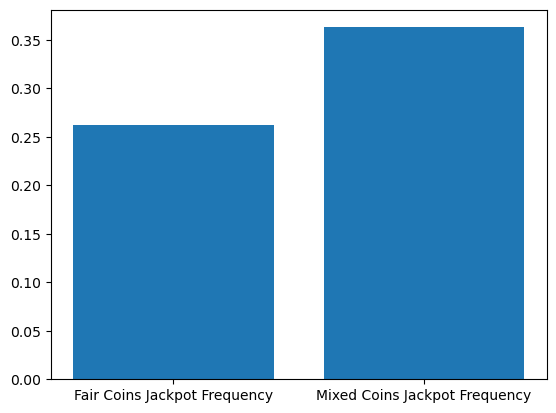

In [19]:
plt.figure()
plt.bar(['Fair Coins Jackpot Frequency','Mixed Coins Jackpot Frequency'],[Freq_Fair_JP, Freq_Mixed_JP])
plt.show()

## Scenario 2

### 1:

In [22]:
faces_array = ([1,2,3,4,5,6])

Fair_Die = Die(faces_array)

Unfair_Die_1 = Die(faces_array)
Unfair_Die_1.weight_change(6, 5)

Unfair_Die_2 = Die(faces_array)
Unfair_Die_1.weight_change(1, 5)

### 2: 

In [27]:
Fair_list = ([Fair_Die,Fair_Die,Fair_Die,Fair_Die,Fair_Die])
All_Fair_Game = Game(Fair_list)
All_Fair_Game.play(10000)
All_Fair_Game.show()

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
1,1,2,2,1,1
2,2,2,2,2,2
3,5,4,2,4,6
4,6,3,6,1,1
5,2,5,3,3,4
...,...,...,...,...,...
9996,6,2,5,2,4
9997,3,3,6,5,6
9998,2,4,2,2,5


### 3:

In [29]:
Mixed_list = ([Unfair_Die_1,Unfair_Die_1,Unfair_Die_2,Fair_Die,Fair_Die])
Mixed_Fair_Game = Game(Mixed_list)
Mixed_Fair_Game.play(10000)
Mixed_Fair_Game.show()

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
1,5,6,4,4,1
2,3,1,5,6,2
3,6,5,3,6,2
4,5,5,3,5,2
5,1,1,1,1,4
...,...,...,...,...,...
9996,1,1,5,6,4
9997,6,1,5,1,1
9998,4,1,2,5,4


### 4:

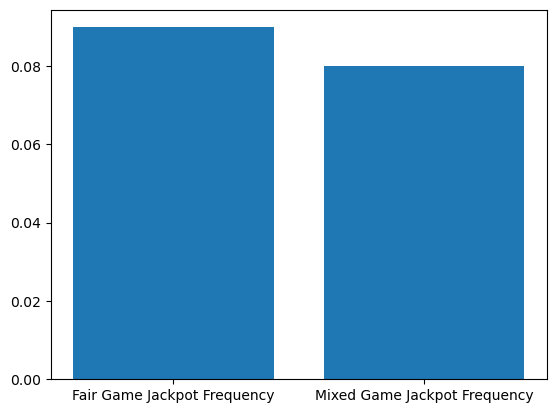

In [31]:
Fair_Game_JP = Analyzer(All_Fair_Game)
Sum_Fair_Game_JP = Fair_Game_JP.jackpot()
Freq_Fair_Game_JP = Sum_Fair_Game_JP/10000

Mixed_Game_JP = Analyzer(Mixed_Fair_Game)
Sum_Mixed_Game_JP = Mixed_Game_JP.jackpot()
Freq_Mixed_Game_JP = Sum_Mixed_Game_JP /10000

plt.figure()
plt.bar(['Fair Game Jackpot Frequency','Mixed Game Jackpot Frequency'],[Freq_Fair_Game_JP, Freq_Mixed_Game_JP])
plt.show()

### 5:

<AxesSubplot:xlabel='Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6'>

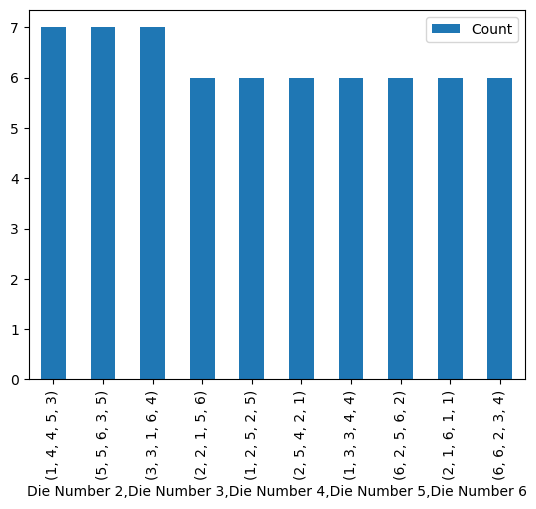

In [33]:
Fair_Game_Combos = Fair_Game_JP .combo().head(10)
Fair_Game_Combos.plot.bar()

<AxesSubplot:xlabel='Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6'>

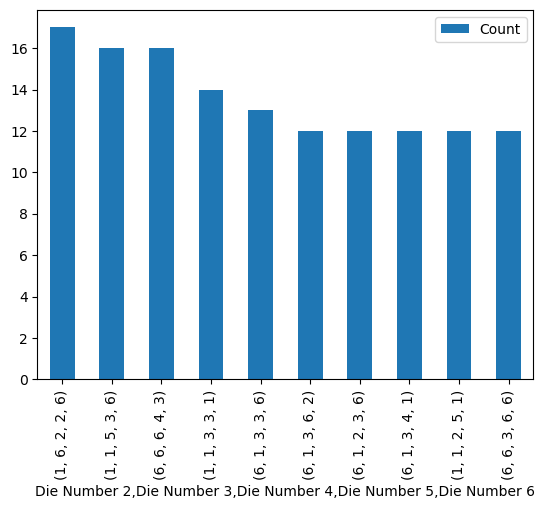

In [34]:
Mixed_Game_Combos = Mixed_Game_JP .combo().head(10)
Mixed_Game_Combos.plot.bar()

## Scenario 3



Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. Keep a running count; this will result in an estimate of the percent of English words in the data. 

### 1:

In [40]:
faces_array = (["A", "B", "C", "D", "E", "F", "G", "H", "I", 'J', 'K','L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
Roman_Alphabet = Die(faces_array)

Roman_Alphabet.weight_change("A",8.4966)
Roman_Alphabet.weight_change("B",2.0720)
Roman_Alphabet.weight_change("C",4.5388)
Roman_Alphabet.weight_change("D",3.3844)
Roman_Alphabet.weight_change("E",11.1607)
Roman_Alphabet.weight_change("F",1.8121)
Roman_Alphabet.weight_change("G",2.4705)
Roman_Alphabet.weight_change("H",3.0034)
Roman_Alphabet.weight_change("I",7.5448)
Roman_Alphabet.weight_change("J",0.1965)
Roman_Alphabet.weight_change("K",1.1016)
Roman_Alphabet.weight_change("L",5.4893)
Roman_Alphabet.weight_change("M",3.0129)
Roman_Alphabet.weight_change("N",6.6544)
Roman_Alphabet.weight_change("O",7.1635)
Roman_Alphabet.weight_change("P",3.1671)
Roman_Alphabet.weight_change("Q",0.1962)
Roman_Alphabet.weight_change("R",7.5809)
Roman_Alphabet.weight_change("S",5.7351)
Roman_Alphabet.weight_change("T",6.9509)
Roman_Alphabet.weight_change("U",3.6308)
Roman_Alphabet.weight_change("V",1.0074)
Roman_Alphabet.weight_change("W",1.2899)
Roman_Alphabet.weight_change("X",0.2902)
Roman_Alphabet.weight_change("Y",1.7779)
Roman_Alphabet.weight_change("Z",0.2722)

Roman_Alphabet.faces_weight_df

,faces,weight
0,A,8.4966
1,B,2.072
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


### 2: 

In [41]:
Alphabet_list = ([Roman_Alphabet,Roman_Alphabet,Roman_Alphabet,Roman_Alphabet,Roman_Alphabet])
Alphabet_Game = Game(Alphabet_list)
Alphabet_Game.play(1000)
Alphabet_Game.show()

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
1,T,R,S,R,H
2,N,C,O,O,O
3,K,R,G,S,L
4,J,A,H,E,O
5,L,U,V,S,O
...,...,...,...,...,...
996,L,N,I,U,A
997,B,L,B,H,A
998,R,K,K,O,S


### 3: 

#### Sample 1:

In [46]:
Alphabet_Result = Alphabet_Game.show()
ar1 = Alphabet_Result.sample(10)
ar1

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
65,H,E,K,N,N
36,O,P,I,P,R
483,D,I,M,I,N
563,G,T,S,C,R
83,L,D,U,B,R
599,U,A,O,R,O
108,E,Y,E,M,N
424,T,K,A,S,U
521,R,C,O,O,E


#### Sample 2:

In [47]:
ar2 = Alphabet_Result.sample(10)
ar2

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
542,N,W,P,A,S
650,N,S,N,O,B
266,E,E,G,N,R
708,I,L,O,S,A
923,T,I,N,T,E
728,E,O,N,L,H
484,C,T,N,X,V
415,N,A,S,P,S
469,C,D,B,I,A


#### Sample 3: 

In [48]:
ar3 = Alphabet_Result.sample(10)
ar3

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
898,A,R,D,R,I
614,H,H,L,O,P
852,C,E,O,I,E
860,P,C,I,I,C
205,C,N,A,E,I
464,O,E,P,R,R
539,S,O,D,F,T
113,A,M,Y,T,T
972,R,A,T,M,L


#### Sample 4: 

In [49]:
ar4 = Alphabet_Result.sample(10)
ar4

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
799,V,A,A,I,S
458,T,C,P,W,C
356,E,Q,A,N,M
718,Y,S,O,S,B
455,R,G,U,V,A
499,R,F,R,S,N
254,A,T,N,A,Y
686,O,R,E,I,S
358,F,B,C,E,F


#### Sample 5:

In [50]:
ar5 = Alphabet_Result.sample(10)
ar5

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
351,I,E,D,S,R
166,W,N,T,N,U
650,N,S,N,O,B
696,S,T,O,M,E
658,O,U,L,N,R
284,A,K,I,T,G
924,A,N,E,H,O
538,E,V,I,A,L
34,P,E,N,E,W


#### Sample 6:

In [51]:
ar6 = Alphabet_Result.sample(10)
ar6

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
967,P,O,I,U,L
47,I,B,N,T,S
106,L,N,T,H,I
258,A,C,P,D,P
292,O,A,E,S,L
116,H,H,D,O,L
996,L,N,I,U,A
624,D,N,D,M,U
61,I,O,M,M,P


#### Sample 7:

In [52]:
ar7 = Alphabet_Result.sample(10)
ar7

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
644,R,E,I,B,O
193,I,I,N,I,N
87,D,T,E,E,A
744,A,Y,C,M,E
938,E,O,E,T,A
952,I,V,H,E,S
871,T,L,T,Y,S
946,G,T,I,E,N
525,R,E,E,A,Y


#### Sample 8:

In [53]:
ar8 = Alphabet_Result.sample(10)
ar8

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
91,C,A,C,E,E
16,N,I,I,E,E
773,B,C,I,O,W
228,Y,O,E,E,M
655,C,S,N,C,U
912,F,I,T,K,I
352,R,M,N,B,S
827,B,C,B,D,E
908,I,W,R,R,I


#### Sample 9: 

In [54]:
ar9 = Alphabet_Result.sample(10)
ar9

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
632,S,R,E,R,C
411,T,O,C,L,M
112,O,L,I,A,A
470,S,I,D,E,M
784,E,A,W,L,T
635,H,Y,R,B,R
855,S,F,E,N,O
58,I,E,T,P,T
811,Y,H,A,G,R


#### Sample 10: 

In [55]:
ar10 = Alphabet_Result.sample(10)
ar10

,Die Number 2,Die Number 3,Die Number 4,Die Number 5,Die Number 6
Roll,,,,,
205,C,N,A,E,I
404,A,U,D,N,F
633,T,O,N,F,R
1000,I,K,E,Z,L
173,U,R,R,S,A
146,T,E,I,E,L
747,I,E,H,O,W
869,T,A,R,T,M
821,C,N,E,S,C


#### Summary: 

Sample 1 : 0/10
Sample 2 : 0/10
Sample 3 : 0/10
Sample 4 : 0/10
Sample 5 : 0/10
Sample 6 : 0/10
Sample 7 : 0/10
Sample 8 : 0/10
Sample 9 : 0/10
Sample 10 :0/10
No words found :( 

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [1]:
!ls -lRF -o

total 408
-rw-r--r--@ 1 imanyousfi  194565 Dec  8 06:45 FinalProjectSubmissionTemplate.ipynb
drwxr-xr-x  3 imanyousfi      96 Dec  8 03:49 __pycache__/
drwxr-xr-x  4 imanyousfi     128 Dec  8 06:43 montecarlo/
-rw-r--r--  1 imanyousfi    3803 Dec  8 03:50 montecarlo_test.py
-rw-r--r--  1 imanyousfi     367 Dec  8 06:44 setup.py
-rw-r--r--  1 imanyousfi     705 Dec  8 03:45 test_results.txt

./__pycache__:
total 16
-rw-r--r--  1 imanyousfi  5677 Dec  8 03:49 montecarlo.cpython-38.pyc

./montecarlo:
total 24
-rw-r--r--  1 imanyousfi    43 Dec  8 06:29 __init__.py
-rw-r--r--@ 1 imanyousfi  5262 Dec  8 03:45 montecarlo.py


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [2]:
%pip install -e .

Obtaining file:///Users/imanyousfi/Desktop/final_project
  Preparing metadata (setup.py) ... done
  Running setup.py develop for montecarlo

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
